# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-3 (43일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

####  예제들과 관련한 정리 (http://darkpgmr.tistory.com/105)
지금까지는 내용을 예제로서만 설명을 하여 따라갔지만, 그 이유에 대해서 간략하게 설명하고, 다음 SVD 관련 정리합니다.

#### 선형사상, 선형변환

두 벡터 공간 사이에 정의 되는 사상중에 벡터 공간을 보존하는 함수. $f: \mathbf V \rightarrow W$ 라면
* $f(\mathbf V_1 + \mathbf V_2) = f(\mathbf V_1) + f(\mathbf V_2)$
* $f(c\mathbf V) = cf(\mathbf V)$

사상 $f$ 가 $\mathbb R^n$ 에서 $\mathbb R^m$ 으로 선형사상인 경우 $f$ 를 $m \times n$ 행렬에 의해 정해지는 $\mathbb R^n$ 에서 $\mathbb R^m$ 으로의 선형 사상이라고 합니다. 

$\begin{pmatrix} y_1 \\ y_2 \\ \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix} $

#### 사상 f 의 핵(kernel) / 영공간 (null space) Ker f

$f$ 를 $m \times n$ 행렬에 의해서 $\mathbb R^n$ 에서 $\mathbb R^m$ 으로 사상 했을때, 상 (image)이 zero vector 가 되는 원소의 집합을 사상 $f$ 의 커널 kernel 핵, 영공간, null space 라고 하고 Ker f 라고 표시 합니다.

ker f = $\{ \mathrm v \in \mathrm V \;|\; f(\mathrm v) = 0 \}$

다음의 예제를 살펴보아요

$A = \begin{pmatrix} 2 & 3 & 5 \\ -4 & 2 & 3 \\ \end{pmatrix} $ 이면 영공간을 구하시오

$\mathbb R^3 $ 에서 벡터 $x, y, z$ 를 생각하면


$ \begin{pmatrix} 2 & 3 & 5 \\ -4 & 2 & 3 \\ \end{pmatrix} \begin{pmatrix} x \\ y \\ z \\ \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ \end{pmatrix} $

이고 이것은 
$$
\begin{align}
2x + 3y + 5z &= 0, \\
-4x + 2y + 3z &= 0
\end{align}
$$

과 같은 선형 연립방정식을 생각 해 볼 수 있다.

이것은 또한 다음과 같은 행렬식으로 표현을 한다.

$$ \left[
\begin{array}{ccc|c}
  2&3&5&0\\
  -4&2&3&0
\end{array}
\right] 
$$


이것을 가우스-조단 소거법을 이용하면 다음과 같이 됩니다.
$$ \left[
\begin{array}{ccc|c}
  1&0&1/16&0\\
  0&1&13/8&0
\end{array}
\right] 
$$


따라서 $x, y$ 를 $z$ 에 관한 항으로 구하면
$$
\begin{align}
x &= -\dfrac{1}{16}z \\
y &= -\dfrac{13}{8}z
\end{align}
$$


이 되므로

영벡터는 
$ \begin{pmatrix} x & y & z \\ \end{pmatrix} = c\begin{pmatrix} -1 \\ -26 \\ 16 \\ \end{pmatrix}  $ 의 normalize 한 벡터가 될 것입니다.

이들은 각각 행벡터

$ \begin{pmatrix} 2 & 3 & 5 \\ \end{pmatrix} \cdot \begin{pmatrix} -1 \\ -26 \\ 16 \\ \end{pmatrix} = 0  $ 과 $ \begin{pmatrix} -4 & 2 & 3 \\ \end{pmatrix} \cdot \begin{pmatrix} -1 \\ -26 \\ 16 \\ \end{pmatrix} = 0  $ 이 된다


In [26]:
#install.packages("pracma")
library(pracma)

In [25]:
A = matrix(c(2,3,5,-4,2,3), 2, 3, byrow = TRUE)
print(A)

     [,1] [,2] [,3]
[1,]    2    3    5
[2,]   -4    2    3


In [28]:
# kernel 구함
kerf = nullspace(A)
print(kerf)
                 

            [,1]
[1,] -0.03273853
[2,] -0.85120179
[3,]  0.52381648


In [35]:
A1 = A[1,]
print(A1)

print(A1 %*% kerf)

A2 = A[2,]
print(A2)

print(round(A2 %*% kerf, 2))

[1] 2 3 5
     [,1]
[1,]    0
[1] -4  2  3
     [,1]
[1,]    0


#### 사상 f 의 상 Im f

$ Im\; f = \{ f(\mathrm v) \;|\; \mathrm v \in \mathrm V \}$

즉 유한 차원 벡터 공간 $\mathrm V$ 에서 정의 되는 선형 사상 $f: \mathrm V \rightarrow \mathrm V$ 에 대해 사상 f 가 모든 원소를 자기 자신으로 보낼때 사상 f 의 상 또는 치역이라고 합니다.


#### 차원 정리

Ker f 는 $\mathbb R^n$ 의 부분공간이고, im f 는 $\mathbb R^m$ 의 부분공간이면 dim(Ker f) 와 dim(Im f) 사이에는 
dim($\mathrm V $) = dim(Ker f) + dim(Im f) 관계가 있습니다.

#### 행렬의 계수 rank, rank A rk(A)

선형대수에서 행렬 A 의 열계수 column rank 는 선형 독립인 열벡터의 최대 개수 입니다. 또한 행계수는 선형독립인 행(row rank) 벡터의 최대 개수 입니다.
행렬에서는 열계수와 행계수는 항상 같으므로 구분없이 이를 계수 정리(rank theorem) 라고 합니다.

계수는 상공간 (Im f) 차원을 계수라고 정의 할 수 있으며, 따라서 전체 차원에서 null space 차원을 뺀 수를 계수라고 할 수 있다.


예 1)

$$
 1차 연립방정식 
\begin{cases}
y_1 &= 4x_1 + 6x_2  \\
y_2 &= 2x_1 + 1 x_2 
\end{cases}
$$

이 식은 다음처럼 행렬식으로 표현 하고 열벡터 를 가져오면


$ \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} 4x_1 + 6x_2 \\ 2x_1 + 1x_2 \end{pmatrix} = \begin{pmatrix} 4&6 \\ 2&1 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = x_1\begin{pmatrix} 4 \\ 2 \end{pmatrix} + x_2\begin{pmatrix} 6 \\ 1 \end{pmatrix}$


두벡터 $ \begin{pmatrix} 4 \\ 2 \end{pmatrix}$ 와 $ \begin{pmatrix} 6 \\ 1 \end{pmatrix}$ 은 선형 독립이므로 rank $ \begin{pmatrix} 4 & 6\\ 2&1 \end{pmatrix} = 2$ 이다.

예 2)

$$
 1차 연립방정식 
\begin{cases}
y_1 &= 4x_1 + 6x_2  \\
y_2 &= 2x_1 + 3 x_2 
\end{cases}
$$

이 식은 다음처럼 행렬식으로 표현 하고 열벡터 를 가져오면


$ \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix} 4x_1 + 6x_2 \\ 2x_1 + 3x_2 \end{pmatrix} = \begin{pmatrix} 4&6 \\ 2&3 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = x_1\begin{pmatrix} 4 \\ 2 \end{pmatrix} + x_2\begin{pmatrix} 6 \\ 3 \end{pmatrix} = 2x_1\begin{pmatrix} 2 \\ 1 \end{pmatrix} + 3x_2\begin{pmatrix} 2 \\ 1 \end{pmatrix} = [2x_1 + 3x_2]\begin{pmatrix} 2 \\ 1 \end{pmatrix} $


이므로 rank $ \begin{pmatrix} 4 & 6\\ 2&3 \end{pmatrix} = 1$ 이다.

행렬의 계수를 계산하는 좀더 간단한 방법은 가우스-조르단 소거법( 행사다리꼴) 을 이용하여, 0 이 아닌 행의 갯수가 rank 가 됩니다.

$$
\mathbf A = \begin{pmatrix} 2&1&0&4\\4&3&-1&12\\0&-3&3&-12 \end{pmatrix} (2행 = 2 행 - 1 행 \times 2) \Rightarrow \begin{pmatrix} 2&1&0&4 \\ 0&1&-1&4\\0&-3&3&-12 \end{pmatrix}(3행 = 3행 + 2행 \times 2) \Rightarrow \begin{pmatrix} 2&1&0&4 \\ 0&1&-1&4 \\ 0&0&0&0 \end{pmatrix}
$$

마지막 결과에서 행 사다리꼴이 되고, 2개의 0 이 아닌 행이 있으므로 rank A = 2 가 된다.

In [36]:
# R 로서 구현해보면 
A = matrix(c(2,1,0,4,4,3,-1,12,0,-3,3,-12), nrow = 3, ncol = 4, byrow = TRUE)
print(A)

     [,1] [,2] [,3] [,4]
[1,]    2    1    0    4
[2,]    4    3   -1   12
[3,]    0   -3    3  -12


In [39]:
print(rank(A)) # 이것은 우리가 구하는 rank 가 아닙니다.

 [1]  7.0 10.5  4.5  6.0  8.5  2.0  4.5  3.0  8.5 10.5 12.0  1.0


In [42]:
library(Matrix)

In [43]:
rankMatrix(A)

[1] 2
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 8.881784e-16

### 마르코프 과정 및 대각화 적용하여 계산하기

### 대각화에 p 제곱을 하였을 경우

$\mathbf A = \mathbf P \mathbf \Lambda \mathbf P^{-1}$ 이 되면

$\mathbf A^2 은  \mathbf P \mathbf \Lambda \mathbf P^{-1} \mathbf P \mathbf \Lambda \mathbf P^{-1} = \mathbf P \mathbf \Lambda \mathbf I \mathbf \Lambda \mathbf P^{-1} = \mathbf P \mathbf \Lambda^2 \mathbf P^{-1}$ 이 된다.

이것을 p 제곱 까지 적용해나가면
$\mathbf A^p =  \mathbf P \mathbf \Lambda^p \mathbf P^{-1}$ 가 됩니다.

$\Lambda$ 는 대각행렬이므로 $\Lambda^p$ 는 각 대각선 요소의 p 제곱으로 나타나게 됩니다.

### 마르코프 과정, 마코프 과정, 마코프 연쇄

* 확률과정(Stochastic process): 시스템의 상태가 시간에 따라 확률적으로 변해가는 과정
* 마코프 과정(Markov process): 확률과정 중에 시스템의 미래 상태가 현재의 상태만 주어지면 과거의 역사와는 무관하게 결정는 확률과정
* 마코프 연쇄(Markov chain): 마코프 과정에서 시간의 변화를 연속적으로 고려하지 않고 이산적인 경우만 고려한 경우. 

#### 마코브 연쇄의 예 (가장 많은 예: 조미료 회사)


조미료 회사에서 어느 도시가구의 화학조미료 사용 현황 조사 결과
* 전체 가구의 80%가 음식을 조리 할 때 화학 조미료 사용
* 다음 표와 같은 확률에 의해 월별 조미료 사용 변화

$$
\text{<월별 조미료 사용 변화 확률>} \\
\begin{array}{|c|l|c|}
\hline
\text{이번달 \ 다음달} & \text{사용함} & \text{사용 안함} \\
\hline
사용함 & 0.9 & 0.1 \\
사용 안함 & 0.05 & 0.95 \\
\hline
\end{array}
$$


* 상태전이도
   * $s_1$ = 조미료 사용, $s_2$ 조미료 사용 안함.
<img src="trans.gif" width="300px" >

* 사용변화 확률표를 행렬로 표시 하면 전이확률 행렬 또는 전이행렬 이라고 합니다.

$\mathbf P = \begin{pmatrix} 0.9&0.1\\0.05&0.95 \end{pmatrix} $

* 확률 나무에 의한 2달후 점유율 예측
<img src="ptree.gif" width="300px" >

* 이번달에 조미료를 사용하던 가구가 
   * 두달후에도 계속 조미료를 사용할 확률: 0.81 + 0.005 = 0.815
   * 두달후에 조미료를 사용 하지 않을 확률: 0.09 + 0.095 = 0.185

* 전이확률에 위한 직접 계산을 수행하면

In [49]:
P = matrix(c(0.9,0.1,0.05,0.95), nrow=2, byrow = TRUE)
print(P)

     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.05 0.95


In [50]:
#install.packages("matrixcalc")


The downloaded binary packages are in
	/var/folders/3b/1f9v1lwn73q8hwwj6344j9pw0000gn/T//RtmpPJoKVc/downloaded_packages


In [53]:
# 두달이므로 P^2 을 계산해보면 위와 결과가 같다.
require(matrixcalc)
'P^2='
print(P %*% P)
print(matrix.power(P,2))

[1] "P^2="

       [,1]   [,2]
[1,] 0.8150 0.1850
[2,] 0.0925 0.9075
       [,1]   [,2]
[1,] 0.8150 0.1850
[2,] 0.0925 0.9075


#### 안정상태 분석
* 안전상대란  
    위의 조미료 회사 예를 살펴보아요.  
    66개월 이후에 보면 전이행렬이 변화하지 않는 상태가 되는데, 이를 안정상태라고 합니다.

In [61]:
'P^1='
print(round(matrix.power(P,1),4))
'P^6='
print(round(matrix.power(P,6),4))
'P^12='
print(round(matrix.power(P,12),4))
'P^24='
print(round(matrix.power(P,24),4))
'P^36='
print(round(matrix.power(P,36),4))
'P^64='
print(round(matrix.power(P,64),4))
'P^65='
print(round(matrix.power(P,65),4))
'P^66='
print(round(matrix.power(P,66),4))
'P^67='
print(round(matrix.power(P,67),4))
'P^100='
print(round(matrix.power(P,100),4))
'P^200='
print(round(matrix.power(P,200),4))


[1] "P^1="

     [,1] [,2]
[1,] 0.90 0.10
[2,] 0.05 0.95


[1] "P^6="

       [,1]   [,2]
[1,] 0.5848 0.4152
[2,] 0.2076 0.7924


[1] "P^12="

       [,1]   [,2]
[1,] 0.4282 0.5718
[2,] 0.2859 0.7141


[1] "P^24="

       [,1]   [,2]
[1,] 0.3468 0.6532
[2,] 0.3266 0.6734


[1] "P^36="

       [,1]   [,2]
[1,] 0.3353 0.6647
[2,] 0.3324 0.6676


[1] "P^64="

       [,1]   [,2]
[1,] 0.3334 0.6666
[2,] 0.3333 0.6667


[1] "P^65="

       [,1]   [,2]
[1,] 0.3334 0.6666
[2,] 0.3333 0.6667


[1] "P^66="

       [,1]   [,2]
[1,] 0.3333 0.6667
[2,] 0.3333 0.6667


[1] "P^67="

       [,1]   [,2]
[1,] 0.3333 0.6667
[2,] 0.3333 0.6667


[1] "P^100="

       [,1]   [,2]
[1,] 0.3333 0.6667
[2,] 0.3333 0.6667


[1] "P^200="

       [,1]   [,2]
[1,] 0.3333 0.6667
[2,] 0.3333 0.6667


결과에서 보면 66개월 이후에는 전이 행렬이 변화하지 않는데, 이런 상태를 전이행렬이 안정상태라고 합니다.

조금 더 이야기를 진행하기 위해서 몇가지 라이브러리를 설치 합니다.

In [75]:

# https://www.r-bloggers.com/getting-started-with-markov-chains/
#install.packages("expm")
#install.packages("markovchain")
#install.packages("diagram")
#install.packages("pracma")


In [76]:
library(expm)
library(markovchain)
library(diagram)
library(pracma)

In [118]:
stateNames = c("Rain", "Nice", "Snow")
Oz = matrix(c(.5,.25,.25,.5,0,.5,.25,.25,.5), nrow = 3, byrow=TRUE)
rownames(Oz) = stateNames
colnames(Oz) = stateNames
round(Oz, 3)

,Rain,Nice,Snow
Rain,0.50,0.25,0.25
Nice,0.50,0.00,0.50
Snow,0.25,0.25,0.50


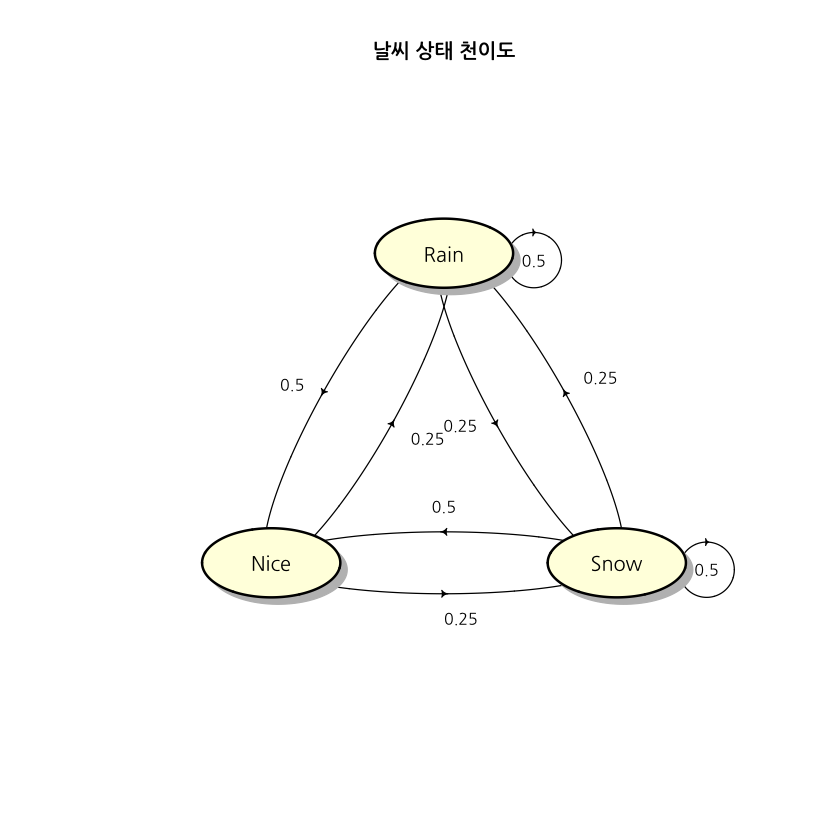

In [112]:
par(family="NanumGothic")  # 한글 폰트 설정
options(warn=-1)  # 워닝 disable

plotmat(Oz,pos = c(1,2),
        lwd = 1, box.lwd = 2,
        cex.txt = 0.8,
        box.size = 0.1,
        box.type = "circle",
        box.prop = 0.5,
        box.col = "light yellow",
        arr.length=.1,
        arr.width=.1,
        self.cex = .4,
        self.shifty = -.01,
        self.shiftx = .13,
        main = "날씨 상태 천이도")
options(warn=0)

In [119]:
# 3번 천이 했을 경우 전이행렬
Oz3 = Oz %^% 3
round(Oz3,3)

,Rain,Nice,Snow
Rain,0.406,0.203,0.391
Nice,0.406,0.188,0.406
Snow,0.391,0.203,0.406


In [122]:
# 오늘 비올 확률이 1/3 , 청명한 날씨가 1/3, 눈올 확률이 1/3 이면 전이 확률에 의해서 3일 후에는 다음과 같은 확률이 됩니다.
u = c(1/3,1/3,1/3)
round(u %*% Oz3, 3)

Rain,Nice,Snow
0.401,0.198,0.401


다음에 마코프체인 부터 계속 진행합니다.
